<a href="https://colab.research.google.com/github/SixDevelop/Research-work/blob/main/%D0%9D%D0%98%D0%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт датасета и его анализ



---



**Импорты**

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
import csv
from matplotlib.figure import Figure 
from matplotlib.axes import Axes
from numpy import ndarray
from collections import Counter
import matplotlib.gridspec as gridspec

from mutagen.mp3 import MP3
from inaSpeechSegmenter import Segmenter
from inaSpeechSegmenter.export_funcs import seg2csv, seg2textgrid
import ffmpeg

Дефолтные данные

In [28]:
path = 'cv-corpus-7.0-2021-07-21/ru/clips/'

**Получение csv таблицы**

In [2]:
full_data = pd.read_table("/Users/sergey/Documents/GitHub/Research-work/cv-corpus-7.0-2021-07-21/ru/validated.tsv", sep='\t')
full_data.to_csv('validated.csv', index=False)
full_data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,002fbee74be6b73a21a0a493965c0fcd5cadcbb74da966...,common_voice_ru_25792615.mp3,Внешние отношения Алексея Александровича с жен...,2,0,NaN,NaN,NaN,ru,NaN
1,0076d72b93a07cfe19b8ab8f8b8f25459fde5fdabb4ebc...,common_voice_ru_26778765.mp3,"Повреждать систему, в том числе устанавливать ...",2,0,fourties,female,NaN,ru,NaN
2,01648c1613193e9f272373de6867c358d542ae833de4da...,common_voice_ru_26587318.mp3,"К сожалению, эти предложения не нашли отражени...",2,0,NaN,NaN,NaN,ru,NaN
3,081340f4cbaab50d8b9606a52488eb0614edd77eb782a4...,common_voice_ru_19468869.mp3,"Если не будет возражений, я буду считать, что ...",2,0,NaN,NaN,NaN,ru,NaN
4,0ca241e701b2431a3b286c4c9f5f42946eae11ec0cd540...,common_voice_ru_25189464.mp3,"Мы особенно рады отметить, что число скрывающи...",2,0,NaN,NaN,NaN,ru,NaN


**Вывод графика полных данных по полу без очистки таблицы от незаполненных полей**

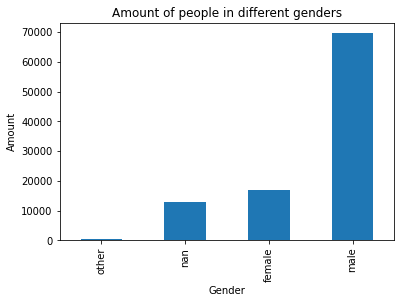

In [3]:
list(full_data.columns)
items = Counter(full_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()


**Исключение ненужных полей из графика**

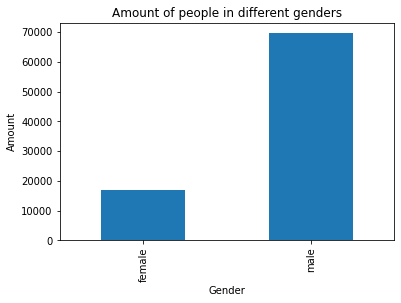

In [4]:

full_data = full_data[full_data.gender.notnull()]
full_data = full_data[full_data.gender != 'other']
full_data.head()
list(full_data.columns)
items = Counter(full_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Выделение тренировочных данных

In [5]:
train_data = pd.read_table("/Users/sergey/Documents/GitHub/Research-work/cv-corpus-7.0-2021-07-21/ru/train.tsv", sep='\t')
train_data.to_csv('train.csv', index=False)
train_data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949650.mp3,Теперь слово предоставляется Генеральному секр...,2,0,teens,male,NaN,ru,NaN
1,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949651.mp3,"В португальском языке такие слова, как жизнь, ...",2,0,teens,male,NaN,ru,NaN
2,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949693.mp3,За прошедший год значительно продвинулось суде...,2,0,teens,male,NaN,ru,NaN
3,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949699.mp3,Я предоставляю слово наблюдателю от Святого Пр...,2,0,teens,male,NaN,ru,NaN
4,119124394354a868c8f5bc2b09616c27f7521a639b06bd...,common_voice_ru_21949704.mp3,Швейцария стала одним из ее авторов.,2,0,teens,male,NaN,ru,NaN


Вывод графика тренировочных данных без очистки

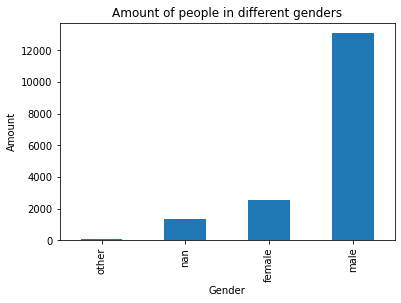

In [6]:
list(train_data.columns)
items = Counter(train_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Исключение ненужных полей из графика

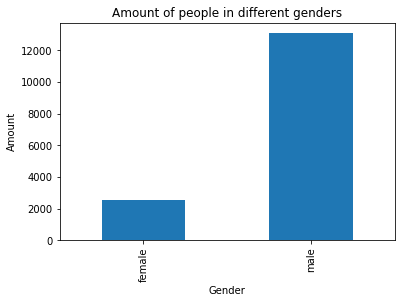

In [7]:
train_data = train_data[train_data.gender.notnull()]
train_data = train_data[train_data.gender != 'other']
list(train_data.columns)
items = Counter(train_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Выделение тестовых данных

In [8]:
test_data = pd.read_table("/Users/sergey/Documents/GitHub/Research-work/cv-corpus-7.0-2021-07-21/ru/test.tsv", sep='\t')
test_data.to_csv('test.csv', index=False)
test_data.head()

,client_id,path,sentence,up_votes,down_votes,age,gender,accent,locale,segment
0,002fbee74be6b73a21a0a493965c0fcd5cadcbb74da966...,common_voice_ru_25792615.mp3,Внешние отношения Алексея Александровича с жен...,2,0,NaN,NaN,NaN,ru,NaN
1,0076d72b93a07cfe19b8ab8f8b8f25459fde5fdabb4ebc...,common_voice_ru_26778765.mp3,"Повреждать систему, в том числе устанавливать ...",2,0,fourties,female,NaN,ru,NaN
2,01648c1613193e9f272373de6867c358d542ae833de4da...,common_voice_ru_26587318.mp3,"К сожалению, эти предложения не нашли отражени...",2,0,NaN,NaN,NaN,ru,NaN
3,081340f4cbaab50d8b9606a52488eb0614edd77eb782a4...,common_voice_ru_19468869.mp3,"Если не будет возражений, я буду считать, что ...",2,0,NaN,NaN,NaN,ru,NaN
4,0ca241e701b2431a3b286c4c9f5f42946eae11ec0cd540...,common_voice_ru_25189464.mp3,"Мы особенно рады отметить, что число скрывающи...",2,0,NaN,NaN,NaN,ru,NaN


Вывод графика тестовых данных без очистки

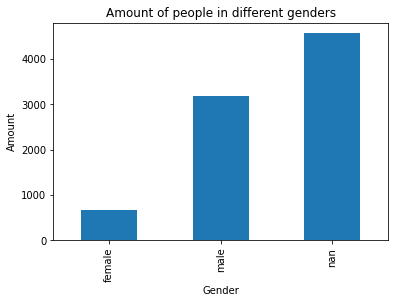

In [9]:
list(test_data.columns)
items = Counter(test_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Очистка тестовых данных

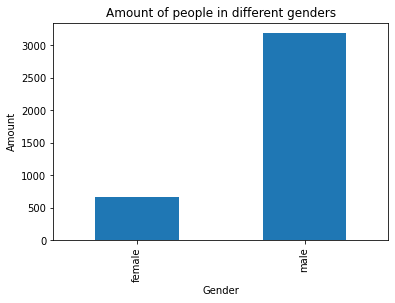

In [10]:
test_data = test_data[test_data.gender.notnull()]
list(test_data.columns)
items = Counter(test_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Получение информации о возрастах в проверенной выборке

In [15]:
full_data.age.value_counts()
# age_full_data = full_data[full_data['age'].isin(['twenties', 'thirties', 'fourties', 'fifties', 'sixties'])]




twenties    44310
fourties    16262
thirties    12331
teens        8808
fifties      4160
sixties        65
Name: age, dtype: int64

Вывод данных с очисткой от лиц младше 20 лет

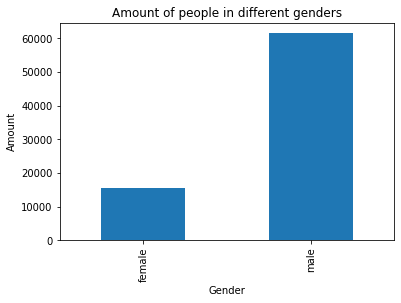

In [16]:
age_full_data = full_data[full_data['age'].isin(['twenties', 'thirties', 'fourties', 'fifties', 'sixties'])]
age_full_data = age_full_data[age_full_data.gender.notnull()]
age_full_data = age_full_data[age_full_data.gender != 'other']
age_full_data.head()
list(full_data.columns)
items = Counter(age_full_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()


#Вывод точного количества людей по полу в обновившейся выборке

In [17]:
age_full_data.gender.value_counts()

male      61559
female    15569
Name: gender, dtype: int64

Получение массива с путями до нужных файлов


In [32]:
full_pathes = []
for i,row in age_full_data.iterrows():
    full_pathes.append(f"{path}{row['path']}")



Получение длины начальных аудиодорожек

In [39]:
time_full_audio = []
for index in full_pathes:
    audio = MP3(index)
    type(audio)
    time_full_audio.append(audio.info.length)

# for i in range(3):
#     print(time_full_audio[i])

Получение средней длины неизменённых аудиофайлов

In [41]:
print(len(time_full_audio))
mid_full_length = sum(time_full_audio) / len(time_full_audio)
print(mid_full_length)

77128
5.296430224756262


Получение данных о возрастах в тренировочной и тестовой выборках

In [46]:
test_data.age.value_counts()
train_data.age.value_counts()

twenties    8324
thirties    3884
teens       1969
fourties    1258
fifties      125
Name: age, dtype: int64

Вывод данных тестовой выборки без лиц младше 20

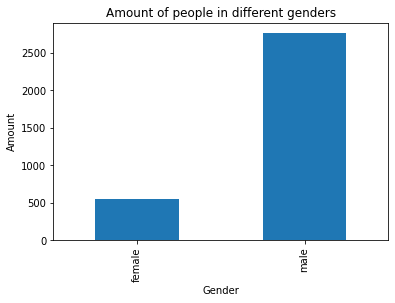

In [47]:
age_test_data = test_data[test_data['age'].isin(['twenties', 'thirties', 'fourties', 'fifties', 'sixties'])]
age_test_data = age_test_data[age_test_data.gender.notnull()]
age_test_data = age_test_data[age_test_data.gender != 'other']
age_test_data.head()
list(age_test_data.columns)
items = Counter(age_test_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Вывод точного количества человек в получившейся выборке

In [49]:
age_test_data.gender.value_counts()

male      2764
female     555
Name: gender, dtype: int64

Вывод данных тренировочной выборки без лиц младше 20

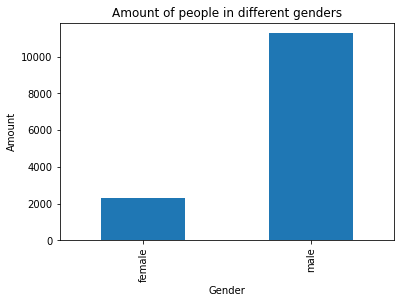

In [48]:
age_train_data = train_data[train_data['age'].isin(['twenties', 'thirties', 'fourties', 'fifties', 'sixties'])]
age_train_data = age_train_data[age_train_data.gender.notnull()]
age_train_data = age_train_data[age_train_data.gender != 'other']
age_train_data.head()
list(age_train_data.columns)
items = Counter(age_train_data.gender)
srs = pd.DataFrame.from_dict(items, orient='index')
srs = srs[0].sort_values(ascending=True)

srs.plot(kind='bar')
plt.xlabel('Gender')
plt.ylabel('Amount')
plt.title('Amount of people in different genders')
plt.show()

Вывод точного количества человек в получившейся выборке

In [50]:
age_train_data.gender.value_counts()

male      11279
female     2312
Name: gender, dtype: int64

Получение путей до нужных файлов 

In [51]:
test_pathes = []
train_pathes = []
for i,row in age_test_data.iterrows():
    test_pathes.append(f"{path}{row['path']}")

for i,row in age_train_data.iterrows():
    train_pathes.append(f"{path}{row['path']}")

Получение длины тестовой и тренировочной выборок

In [52]:
time_test_audio = []
time_train_audio = []
for index in test_pathes:
    audio = MP3(index)
    type(audio)
    time_test_audio.append(audio.info.length)
for index in train_pathes:
    audio = MP3(index)
    type(audio)
    time_train_audio.append(audio.info.length)

Вывод средней длины аудиодорожек в тестовой и тренировочной выборках

In [53]:
mid_train_length = sum(time_train_audio) / len(time_train_audio)
mid_test_length = sum(time_test_audio) / len(time_test_audio)
print(f"Средняя продолжительность аудио в тренировочной выборке: {mid_train_length}, в тестовой: {mid_test_length}")

Средняя продолжительность аудио в тренировочной выборке: 5.476007872857061, в тестовой: 5.9021469192527976
